# Transactions

## Initialization

In [1]:
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
from utils import read_transactions

df = read_transactions('../data/samples/TRANSACTIONS_SAMPLE.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787188 entries, 0 to 787187
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   client_id  787188 non-null  uint64        
 1   tran_date  787188 non-null  datetime64[ns]
 2   cat_c2     787188 non-null  int32         
 3   cat_c3     787188 non-null  int32         
 4   cat_c4     787188 non-null  int32         
 5   fl_c6      787188 non-null  int8          
 6   fl_c7      787188 non-null  int8          
 7   fl_c8      787188 non-null  int8          
 8   fl_c9      787188 non-null  int8          
 9   fl_c10     787188 non-null  int8          
 10  fl_c11     787188 non-null  int8          
 11  fl_c12     787188 non-null  int8          
 12  fl_c13     787188 non-null  int8          
 13  fl_c14     787188 non-null  int8          
 14  fl_c15     787188 non-null  int8          
 15  float_c16  787188 non-null  float32       
 16  float_c17  787188 no

In [3]:
df.head()

,client_id,tran_date,cat_c2,cat_c3,cat_c4,fl_c6,fl_c7,fl_c8,fl_c9,fl_c10,...,fl_c12,fl_c13,fl_c14,fl_c15,float_c16,float_c17,float_c18,int_c19,float_c20,float_c21
0,4130085634078954,2025-03-26,4,211,31,0,1,1,0,0,...,0,1,1,0,0.040,0.000,2.200,-1,0.000,2.200
1,4130085634078954,2025-06-24,4,209,31,0,1,1,0,0,...,0,1,1,0,0.080,0.000,4.300,-1,0.000,4.300
2,4130085634078954,2025-06-24,4,209,31,0,1,1,0,0,...,0,1,1,0,0.040,0.000,2.340,-1,0.000,2.340
3,4130085634078954,2025-06-24,4,209,31,0,1,1,0,0,...,0,1,1,0,0.030,0.000,1.650,-1,0.000,1.650
4,4130085634078954,2025-07-04,4,209,31,0,1,1,0,0,...,0,1,1,0,0.020,0.000,1.800,-1,0.000,1.800


In [4]:
df.describe()

,client_id,tran_date,cat_c2,cat_c3,cat_c4,fl_c6,fl_c7,fl_c8,fl_c9,fl_c10,...,fl_c12,fl_c13,fl_c14,fl_c15,float_c16,float_c17,float_c18,int_c19,float_c20,float_c21
count,787188.000,787188,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,...,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000,787188.000
mean,9451023664570427392.000,2025-04-20 01:20:23.963779584,13.108,286.126,49.187,0.010,0.967,0.999,0.001,0.000,...,0.275,0.221,0.206,0.086,0.028,0.059,61.799,-0.299,1.069,60.729
min,4130085634078954.000,2024-12-01 00:00:00,1.000,1.000,8.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,-12.830,-18.200,0.000,-1.000,0.000,0.000
25%,5058706700319475712.000,2025-03-06 00:00:00,13.000,271.000,31.000,0.000,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,4.000,-1.000,0.000,3.940
50%,9820341575899443200.000,2025-04-22 00:00:00,14.000,305.000,31.000,0.000,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,10.000,-1.000,0.000,10.000
75%,13853360511738910720.000,2025-06-04 00:00:00,15.000,314.000,31.000,0.000,1.000,1.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,0.000,40.000,1.000,0.000,38.270
max,18440239832994052096.000,2025-08-31 00:00:00,74.000,422.000,860.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,75.000,194.320,20500.000,1.000,10500.000,20500.000
std,5233608170803831808.000,NaN,8.109,47.854,107.713,0.101,0.178,0.030,0.030,0.021,...,0.447,0.415,0.404,0.280,0.302,0.798,218.828,0.954,36.576,215.860


In [5]:
print('Mean of transactions by client:')
df.groupby('client_id').size().mean()

Mean of transactions by client:


np.float64(446.504821327283)

## Categorical data

In [6]:
cat_cols = ['cat_c2', 'cat_c3', 'cat_c4']

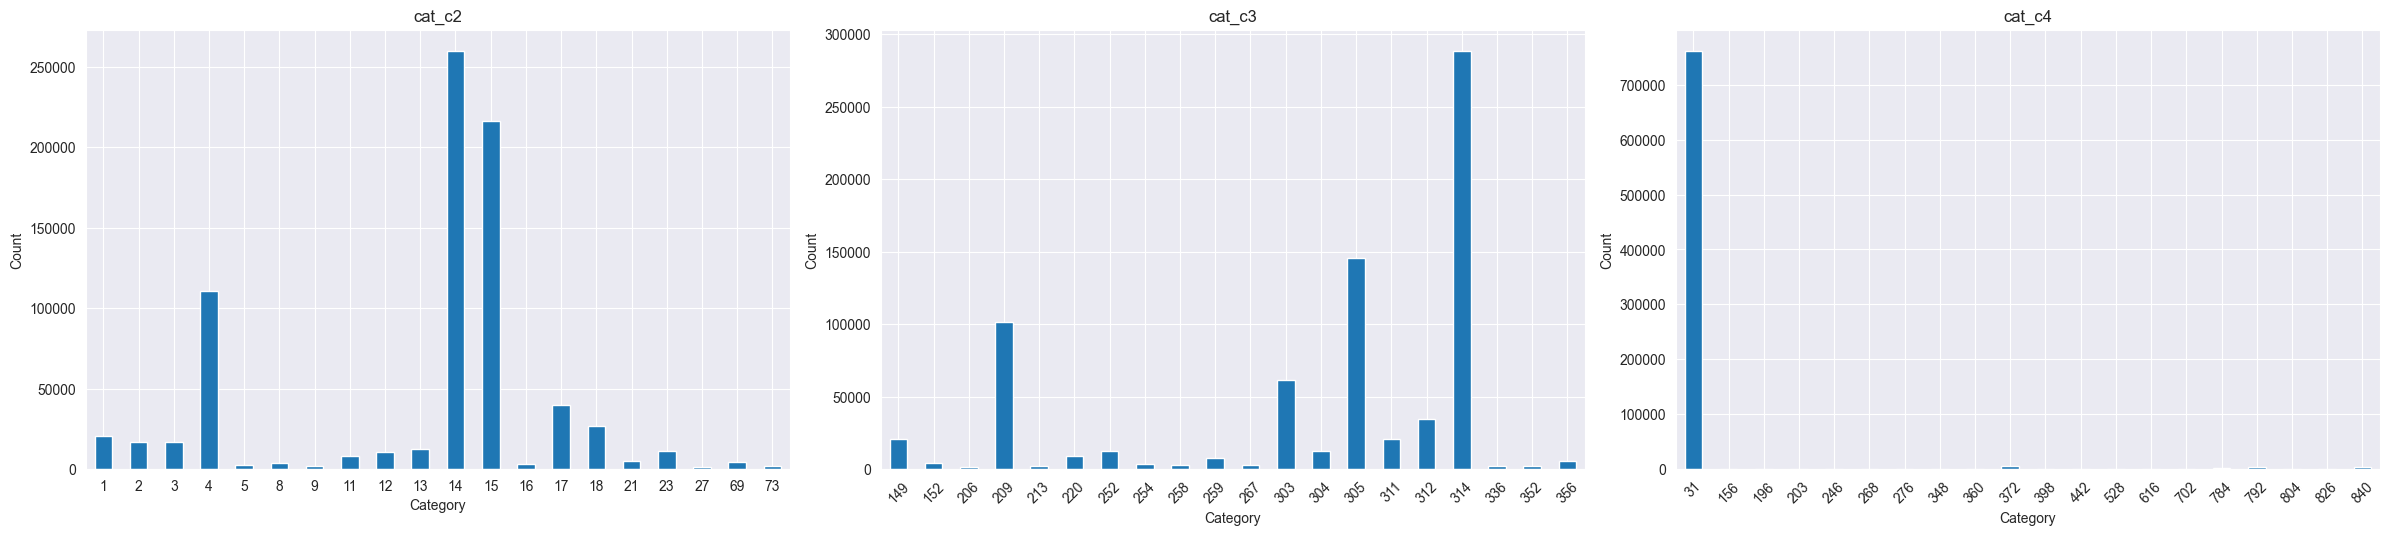

In [7]:
# Plots
from utils import plot_categorical_cols_distribution

plot_categorical_cols_distribution(df, cat_cols)

In [8]:
# Counts
for col in cat_cols:
    print(df[col].astype(int).value_counts().sort_index())

cat_c2
1      20645
2      16715
3      17183
4     110983
5       2444
6        413
7        893
8       3676
9       1870
10      1063
11      8239
12     10894
13     12691
14    260010
15    216499
16      3566
17     40208
18     26918
20      1492
21      5465
23     11719
24       301
25        93
26       385
27      1610
28       529
29        14
31       831
36         3
38        45
41       148
44       424
64       447
68       287
69      4502
70       105
71       141
72      1595
73      2069
74        73
Name: count, dtype: int64
cat_c3
1         8
2        11
3         3
4         2
5       213
       ... 
418      15
419     194
420    1397
421      52
422       1
Name: count, Length: 261, dtype: int64
cat_c4
8           7
31     761382
36          9
40         10
48         36
        ...  
804       173
818        31
826      1123
840      4075
860        95
Name: count, Length: 64, dtype: int64


## Continuous data

In [9]:
cont_cols = ['float_c16', 'float_c17', 'float_c18', 'float_c20', 'float_c21']

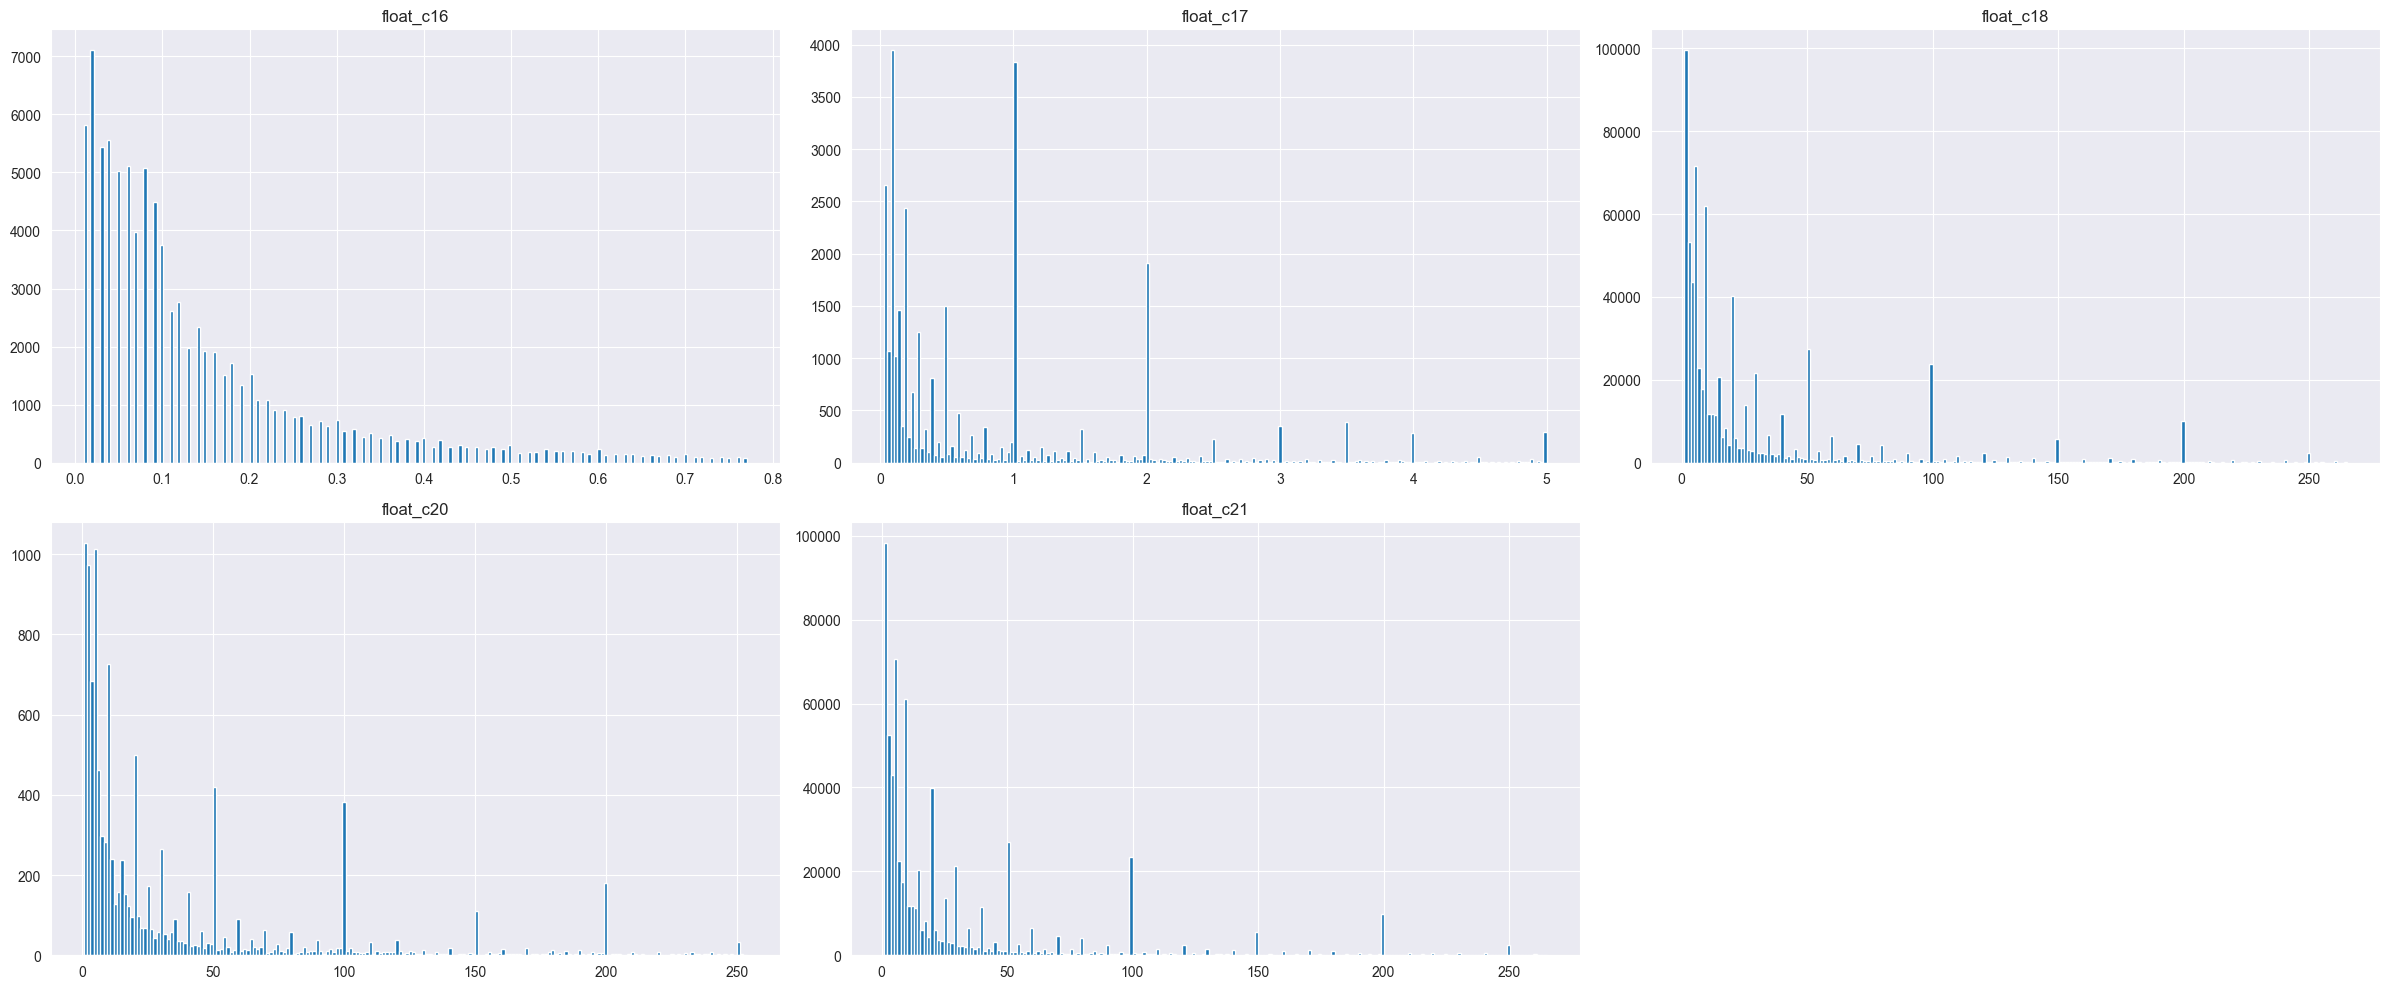

In [10]:
# Histograms
from utils import plot_continuous_cols_distribution

plot_continuous_cols_distribution(df[df[cont_cols] != 0], cont_cols)

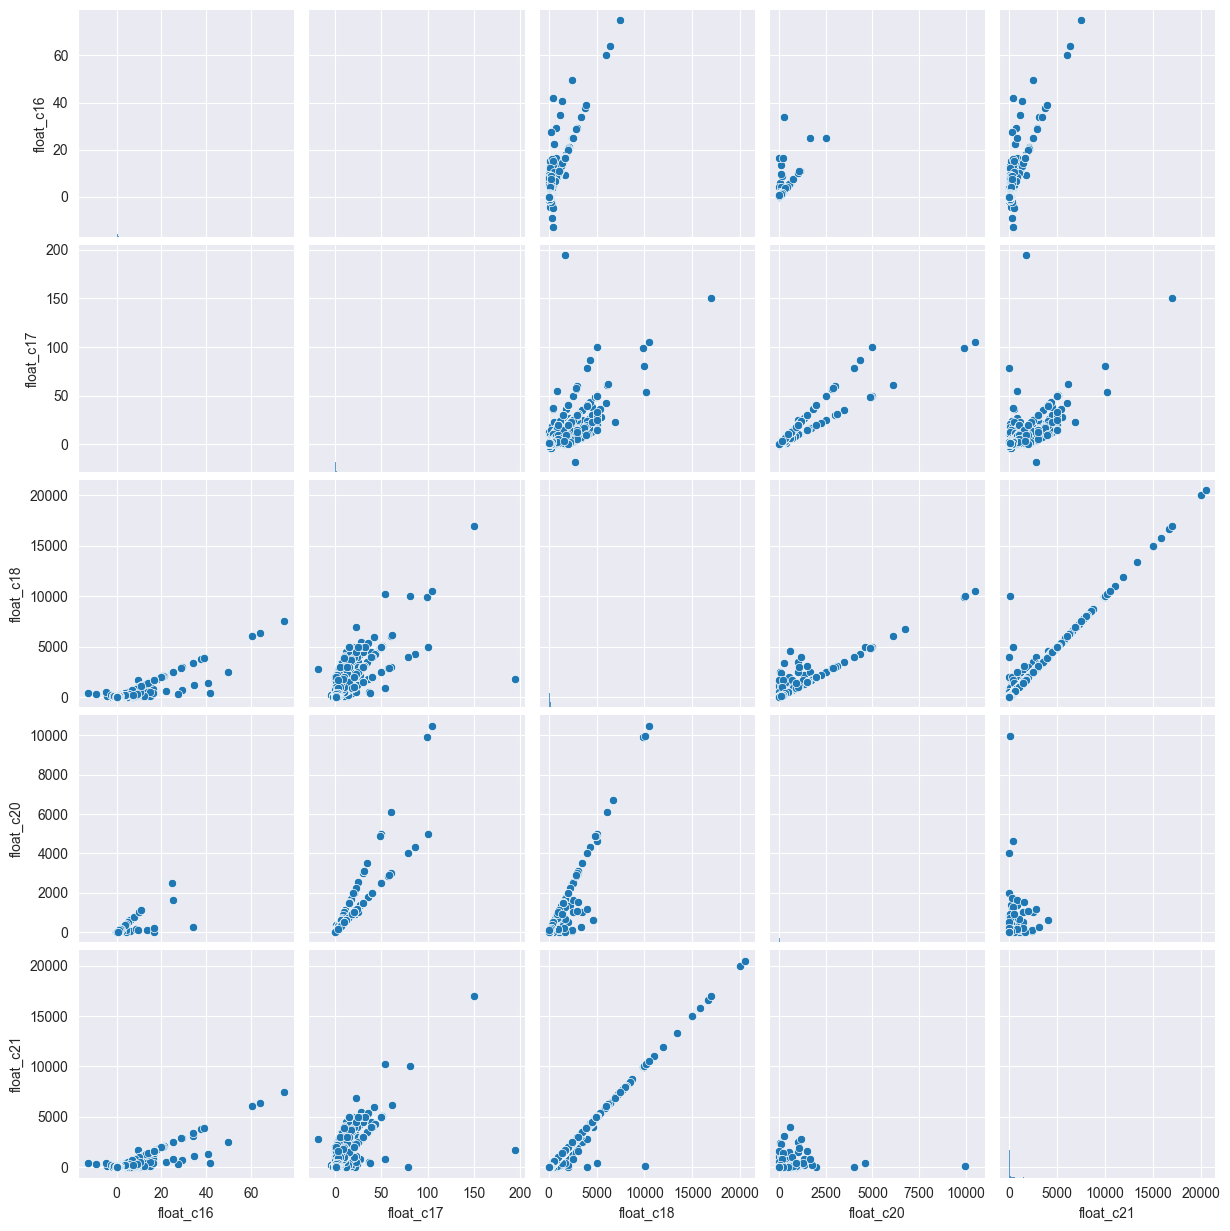

In [13]:
# Pairplot
sns.pairplot(df[df[cont_cols] != 0][cont_cols])

In [11]:
# Correlation matrix
df[cont_cols].corr()

,float_c16,float_c17,float_c18,float_c20,float_c21
float_c16,1.000000,-0.006897,0.068453,0.020050,0.065997
float_c17,-0.006897,1.000000,0.335685,0.352168,0.280628
float_c18,0.068453,0.335685,1.000000,0.164161,0.985932
float_c20,0.020050,0.352168,0.164161,1.000000,-0.003026
float_c21,0.065997,0.280628,0.985932,-0.003026,1.000000
